In [1]:
!pip install um6p-CC-learn==0.2.5

/usr/local/lib/python3.10/dist-packages/um6p_CC_learn/linear_model/logistic_regression.py:39: RuntimeWarning: overflow encountered in exp
  ll = np.sum(y * z - np.log(1 + np.exp(z)))
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/usr/local/lib/python3.10/dist-packages/um6p_CC_learn/linear_model/logistic_regression.py:39: RuntimeWarning: overflow encountered in exp
  ll = np.sum(y * z - np.log(1 + np.exp(z)))
/usr/local/lib/python3.10/dist-packages/um6p_CC_learn/linear_model/logistic_regression.py:39: RuntimeWarning: overflow encountered in exp
  ll = np.sum(y * z - np.log(1 + np.exp(z)))
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERAT

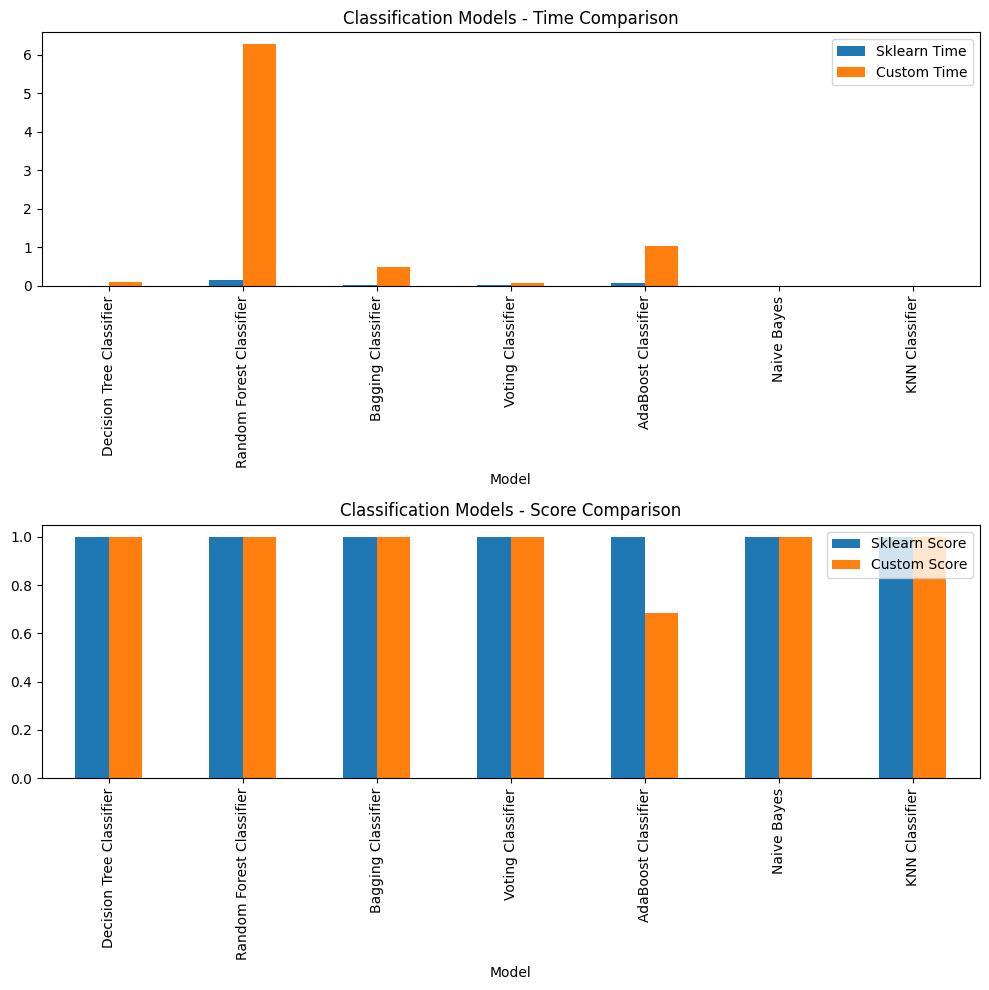

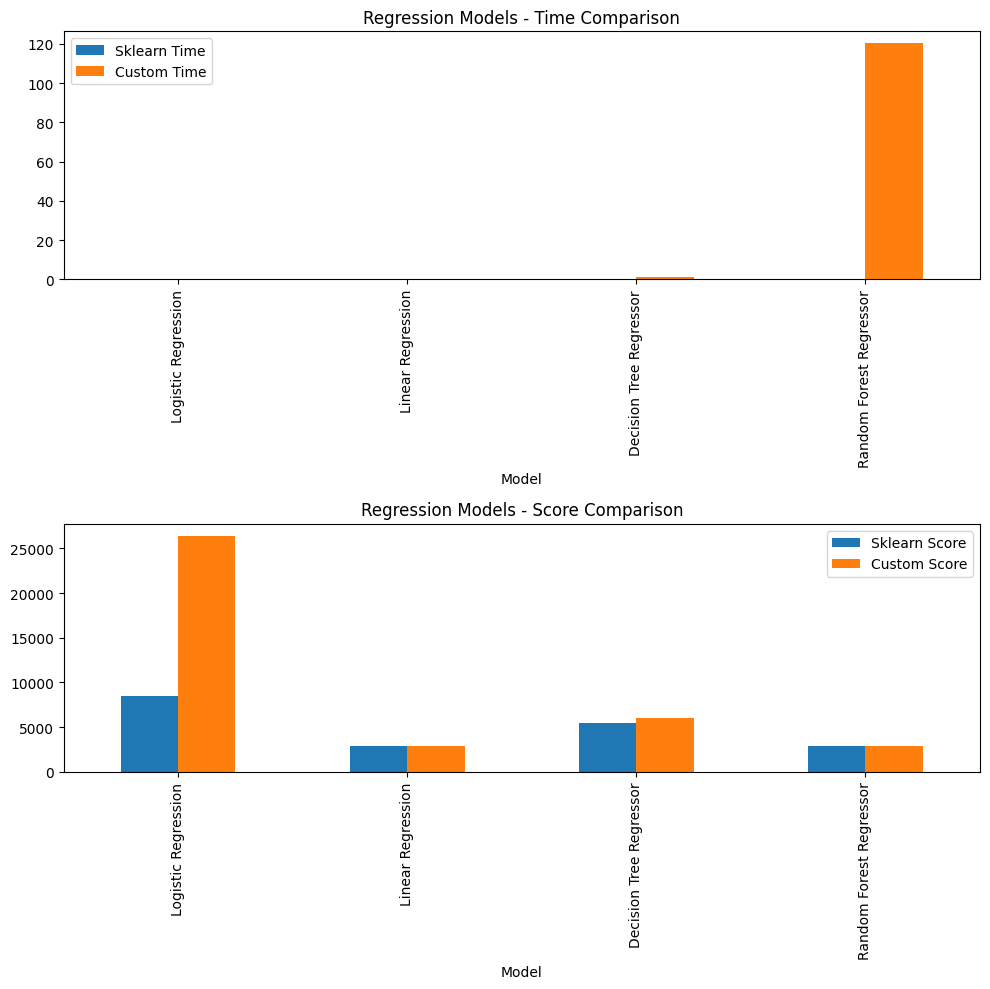

In [7]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.datasets import make_classification, make_regression
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, BaggingClassifier, VotingClassifier, StackingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes, load_iris

# Import custom package
from um6p_CC_learn.linear_model.logistic_regression import LogisticRegression as CustomLogisticRegression
from um6p_CC_learn.linear_model.regression import LinearRegression as CustomLinearRegression
from um6p_CC_learn.tree.decision_tree import DecisionTreeClassifier as CustomDecisionTreeClassifier, DecisionTreeRegressor as CustomDecisionTreeRegressor
from um6p_CC_learn.ensemble.random_forest import RandomForestClassifier as CustomRandomForestClassifier, RandomForestRegressor as CustomRandomForestRegressor
from um6p_CC_learn.ensemble.bagging import BaggingClassifier as CustomBaggingClassifier
from  um6p_CC_learn.ensemble.voting import VotingClassifier as CustomVotingClassifier
#from  um6p_CC_learn.ensemble.stacking import StackingClassifier as CustomStackingClassifier
from  um6p_CC_learn.ensemble.boosting import AdaBoostClassifier as CustomAdaBoostClassifier
from um6p_CC_learn.naive_bayes import GaussianNB as CustomGaussianNB
from um6p_CC_learn.neural_network.multilayer_perceptron import NeuralNetwork as CustomMLPClassifier
from um6p_CC_learn.neighbors.KNeighborsClassifier import KNeighborsClassifier as CustomKNeighborsClassifier

iris = load_iris()
X_class, y_class = iris.data, iris.target

diabetes = load_diabetes()
X_reg, y_reg = diabetes.data, diabetes.target

# Split datasets
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_class, y_class, test_size=0.25, random_state=42)
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.25, random_state=42)

# Define models
models = {
    'Logistic Regression': (LogisticRegression(), CustomLogisticRegression()),
    'Decision Tree Classifier': (DecisionTreeClassifier(), CustomDecisionTreeClassifier()),
    'Random Forest Classifier': (RandomForestClassifier(), CustomRandomForestClassifier()),
    'Bagging Classifier': (BaggingClassifier(), CustomBaggingClassifier()),
    'Voting Classifier': (VotingClassifier(estimators=[('lr', LogisticRegression()), ('dt', DecisionTreeClassifier()), ('knn', KNeighborsClassifier())]), CustomVotingClassifier(estimators=[('lr', CustomLogisticRegression()), ('dt', CustomDecisionTreeClassifier()), ('knn', CustomKNeighborsClassifier())])),
    #'Stacking Classifier': (StackingClassifier(estimators=[('lr', LogisticRegression()), ('dt', DecisionTreeClassifier())], final_estimator=LogisticRegression()), CustomStackingClassifier(estimators=[('lr', CustomLogisticRegression()), ('dt', CustomDecisionTreeClassifier())], final_estimator=CustomLogisticRegression())),
    'AdaBoost Classifier': (AdaBoostClassifier(), CustomAdaBoostClassifier()),
    'Naive Bayes': (GaussianNB(), CustomGaussianNB()),
    'KNN Classifier': (KNeighborsClassifier(), CustomKNeighborsClassifier()),
    #'MLP Classifier': (MLPClassifier(), CustomMLPClassifier()),
    'Linear Regression': (LinearRegression(), CustomLinearRegression()),
    'Decision Tree Regressor': (DecisionTreeRegressor(), CustomDecisionTreeRegressor()),
    'Random Forest Regressor': (RandomForestRegressor(), CustomRandomForestRegressor()),
}

# Function to evaluate models
def evaluate_model(name, sklearn_model, custom_model, X_train, y_train, X_test, y_test, task_type='classification'):
    results = {}

    # Sklearn model
    start_time = time.time()
    sklearn_model.fit(X_train, y_train)
    sklearn_time = time.time() - start_time

    if task_type == 'classification':
        y_pred = sklearn_model.predict(X_test)
        sklearn_score = accuracy_score(y_test, y_pred)
    else:
        y_pred = sklearn_model.predict(X_test)
        sklearn_score = mean_squared_error(y_test, y_pred)

    # Custom model
    start_time = time.time()
    custom_model.fit(X_train, y_train)
    custom_time = time.time() - start_time

    if task_type == 'classification':
        y_pred = custom_model.predict(X_test)
        custom_score = accuracy_score(y_test, y_pred)
    else:
        y_pred = custom_model.predict(X_test)
        custom_score = mean_squared_error(y_test, y_pred)

    results['Model'] = name
    results['Sklearn Time'] = sklearn_time
    results['Custom Time'] = custom_time
    results['Sklearn Score'] = sklearn_score
    results['Custom Score'] = custom_score

    return results

# Benchmark models
classification_results = []
regression_results = []

for name, (sklearn_model, custom_model) in models.items():
    if 'Classifier' in name or 'Naive Bayes' in name or 'MLP' in name:
        result = evaluate_model(name, sklearn_model, custom_model, X_class_train, y_class_train, X_class_test, y_class_test, task_type='classification')
        classification_results.append(result)
    else:
        result = evaluate_model(name, sklearn_model, custom_model, X_reg_train, y_reg_train, X_reg_test, y_reg_test, task_type='regression')
        regression_results.append(result)

# Convert results to DataFrame
classification_df = pd.DataFrame(classification_results)
regression_df = pd.DataFrame(regression_results)

# Plot results
def plot_results(df, title):
    fig, ax = plt.subplots(2, 1, figsize=(10, 10))

    df.plot(kind='bar', x='Model', y=['Sklearn Time', 'Custom Time'], ax=ax[0], title=f'{title} - Time Comparison')
    df.plot(kind='bar', x='Model', y=['Sklearn Score', 'Custom Score'], ax=ax[1], title=f'{title} - Score Comparison')

    plt.tight_layout()
    plt.show()

plot_results(classification_df, 'Classification Models')
plot_results(regression_df, 'Regression Models')
